In [51]:
import mlflow

# Q1

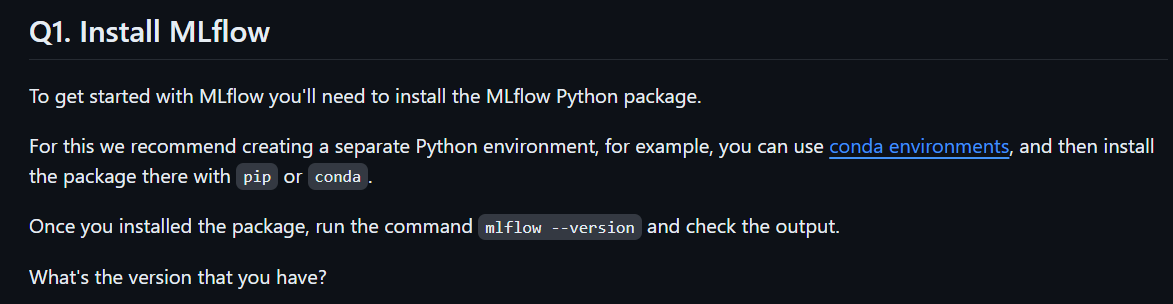

## Answer

In [20]:
!PYTHONWARNINGS="ignore" mlflow --version

mlflow, version 2.11.3


# Q2
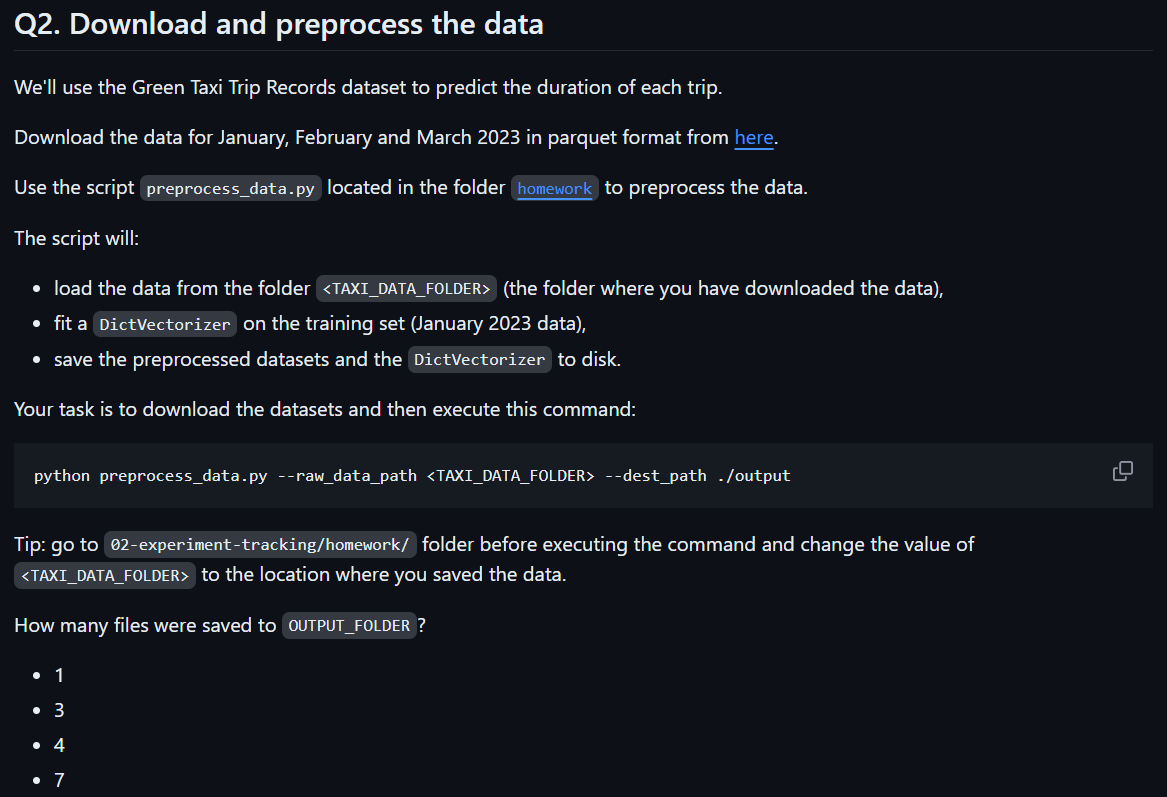

In [21]:
!cd data && wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet && wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet && wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-03.parquet

--2024-05-27 23:07:06--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 99.84.245.157, 99.84.245.193, 99.84.245.9, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|99.84.245.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1427002 (1.4M) [binary/octet-stream]
Saving to: ‘green_tripdata_2023-01.parquet’

green_tripdata_2023 100%[===================>]   1.36M  2.02MB/s    in 0.7s    

2024-05-27 23:07:07 (2.02 MB/s) - ‘green_tripdata_2023-01.parquet’ saved [1427002/1427002]

--2024-05-27 23:07:07--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 99.84.245.157, 99.84.245.193, 99.84.245.9, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|99.84.245.157|:443... connected.
HTTP request sent, a

In [22]:
!python preprocess_data.py --raw_data_path data --dest_path ./output

In [23]:
!ls output

dv.pkl	test.pkl  train.pkl  val.pkl


## Answer

In [24]:
!ls output | wc -l

4


# Q3
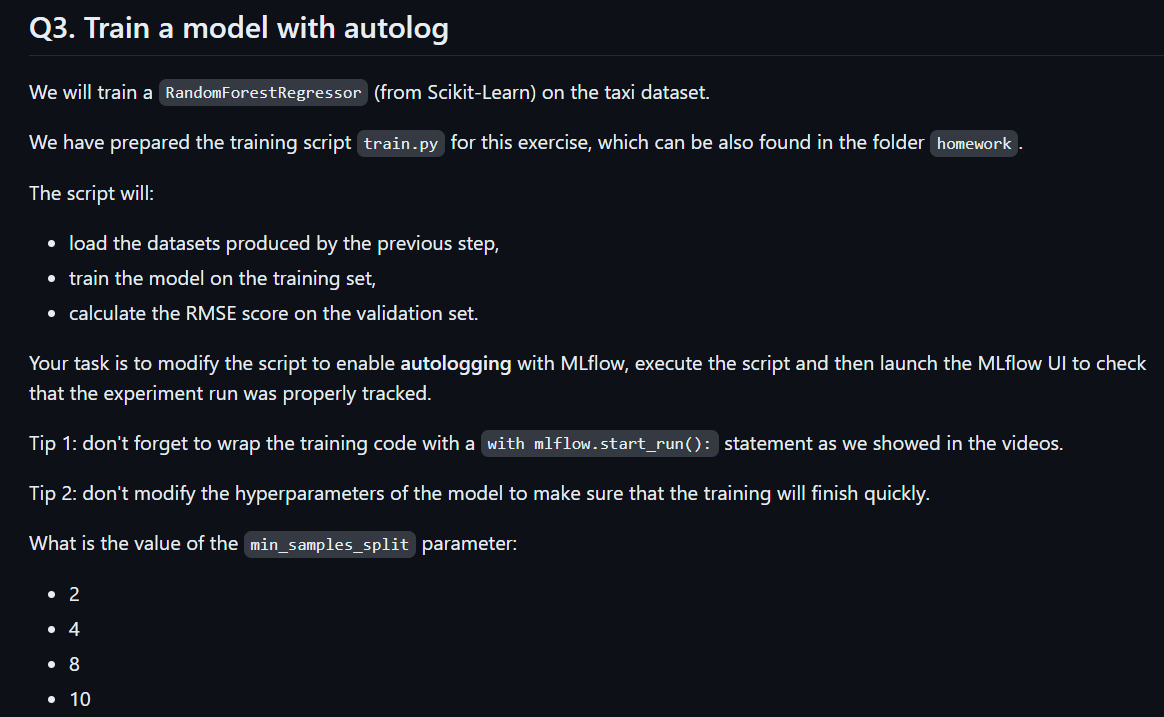

In [25]:
!python train.py

2024/05/27 23:07:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/05/27 23:07:20 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
2024/05/27 23:07:28 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The configured tracking uri scheme: 'file' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'http', 'https'}


## Answer

In [35]:
print("min_samples_split:", mlflow.search_runs(search_all_experiments=True).iloc[0]['params.min_samples_split'])

min_samples_split: 2


Or in the UI  
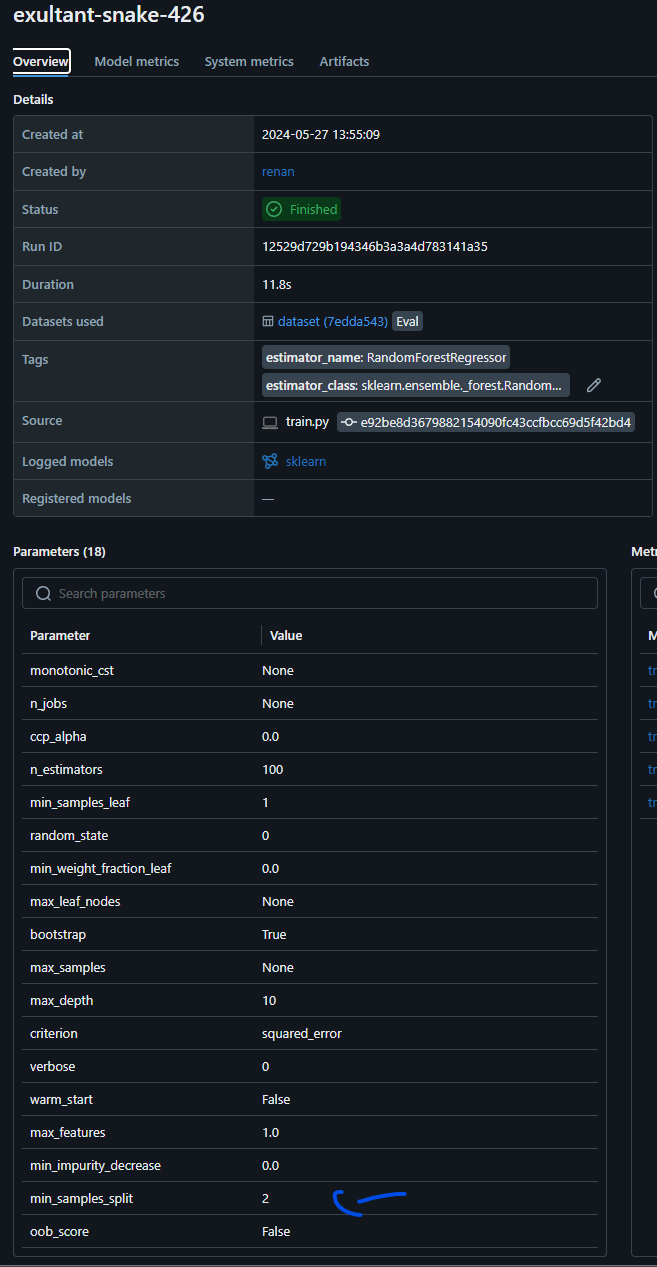

# Q4
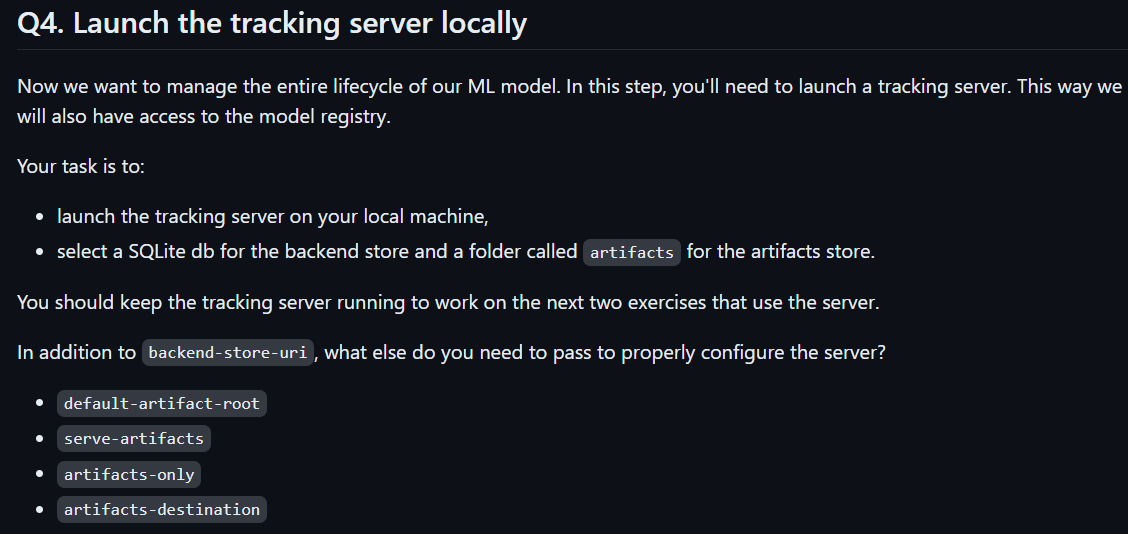

In [39]:
!python train.py

2024/05/27 23:13:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/05/27 23:13:56 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
2024/05/27 23:14:05 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The configured tracking uri scheme: 'file' is invalid for use with the proxy mlflow-artifact scheme. The allowed tracking schemes are: {'http', 'https'}


In [40]:
!ls mlruns.db

mlruns.db


In [41]:
!ls -latR artifacts/

artifacts/:
total 8
drwxr-xr-x 8 renan renan 4096 May 27 23:11 ..
drwxr-xr-x 2 renan renan 4096 May 27 23:11 .


Ran in an actual terminal
```bash
mlflow server \
  --backend-store-uri sqlite:///mlruns.db \
  --default-artifact-root ./artifacts
```

## Answer
default-artifact-root

# Q5
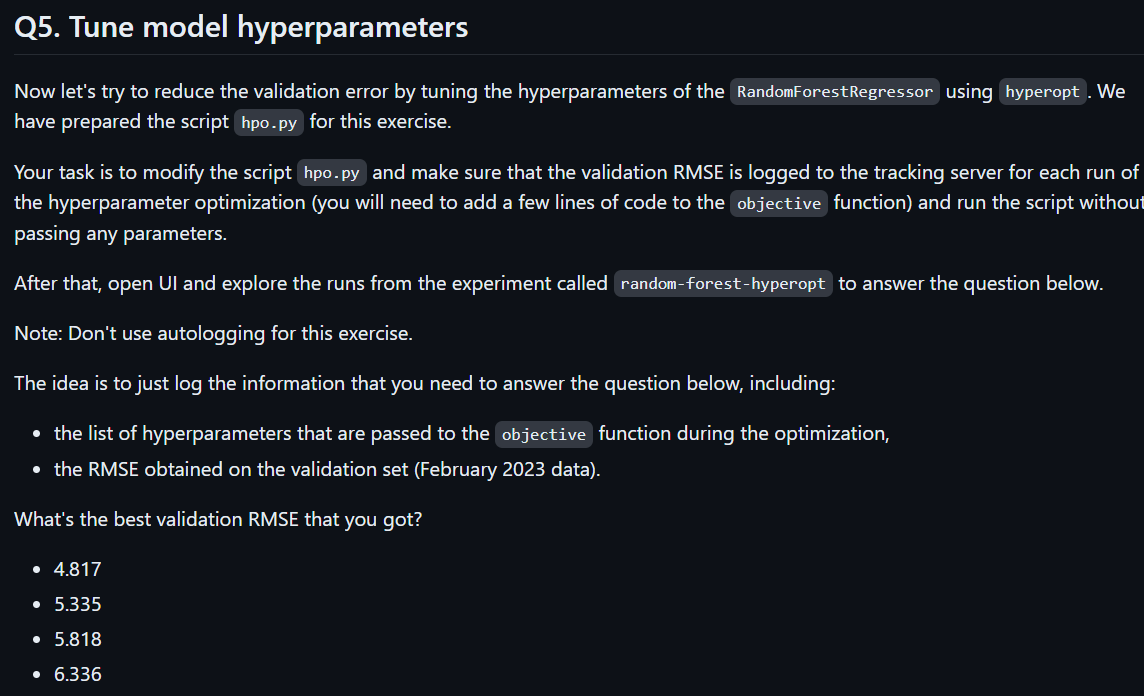

In [97]:
!python hpo.py

2024/05/28 00:09:03 INFO mlflow.tracking.fluent: Experiment with name 'random-forest-hyperopt' does not exist. Creating a new experiment.
100%|██████████| 15/15 [00:42<00:00,  2.85s/trial, best loss: 5.335419588556921]


In [98]:
round(5.335419588556921, 3)

5.335

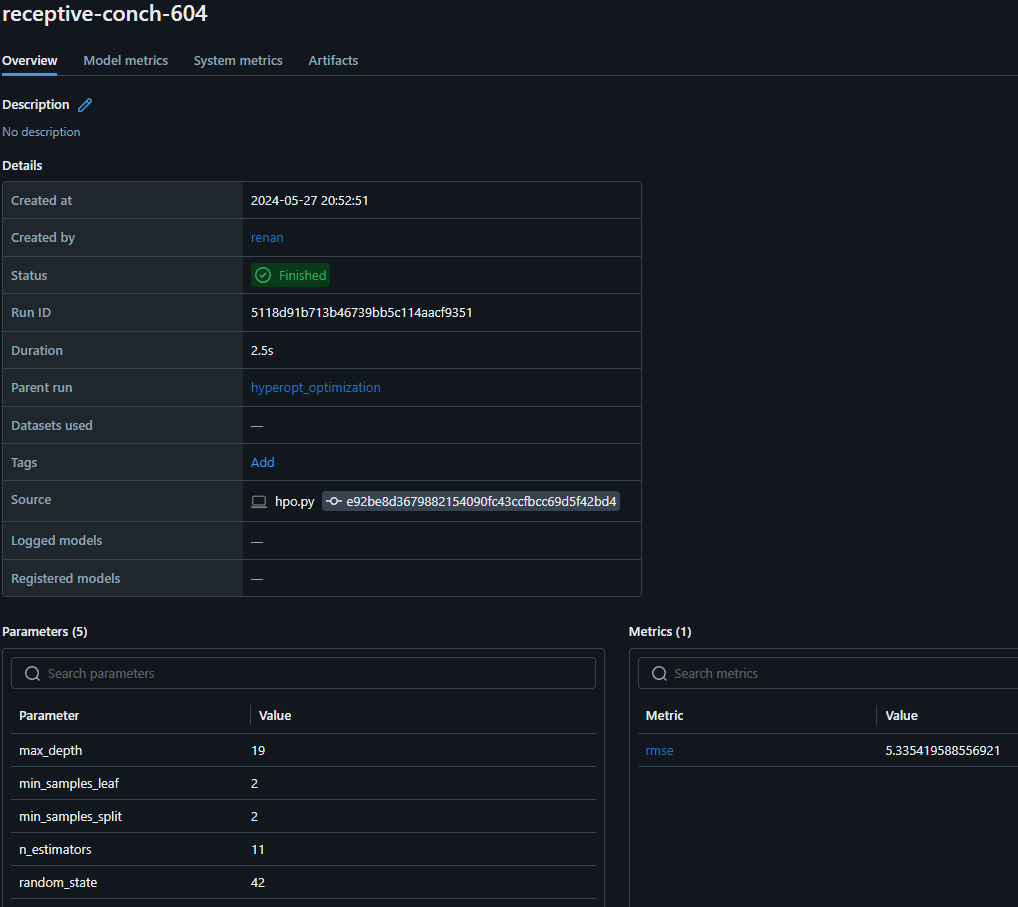

In [127]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [128]:
lowest_rmse = (
    mlflow.search_runs(
        # filter_string='attributes.run_name = "hyperopt_optimization"', 
        search_all_experiments=True,
    )
    .sort_values('metrics.rmse')
    .iloc[0]['metrics.rmse']
)

## Answer

In [129]:
round(lowest_rmse, 3)

5.335

# Q6
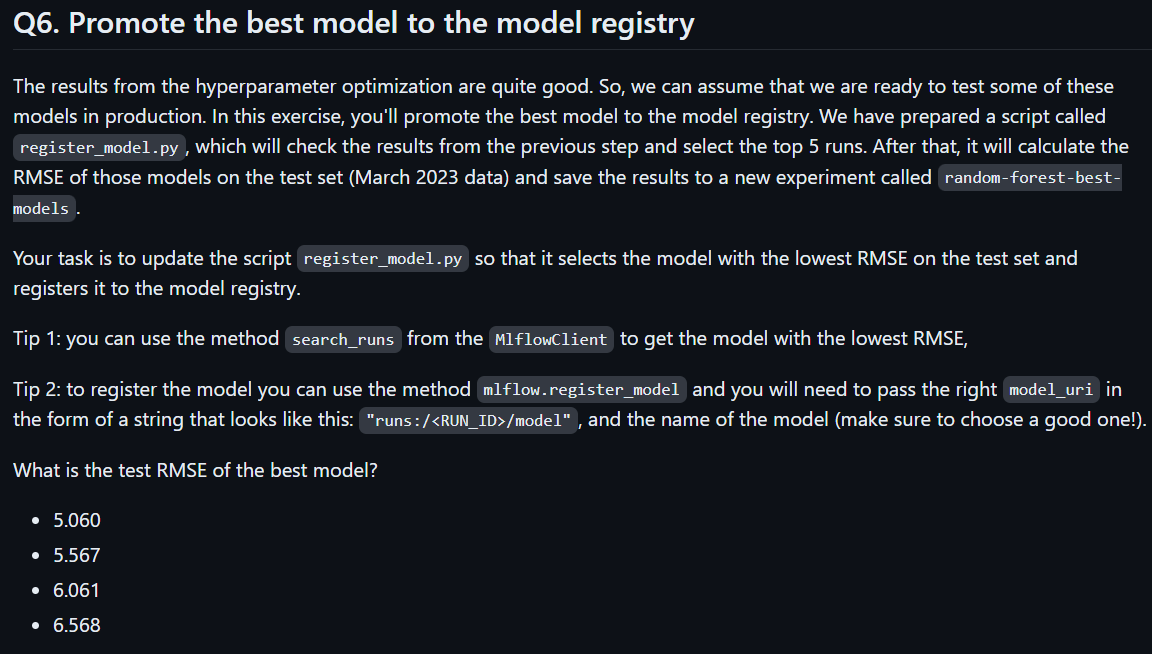

In [102]:
!python register_model.py

2024/05/28 00:09:47 INFO mlflow.tracking.fluent: Experiment with name 'random-forest-best-models' does not exist. Creating a new experiment.
2024/05/28 00:09:48 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
2024/05/28 00:09:52 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/renan/anaconda3/lib/python3.11/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils."
2024/05/28 00:09:54 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
2024/05/28 00:10:04 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
2024/05/28 00:10:11 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray

## Answer

In [139]:
experiment_id = mlflow.get_experiment_by_name("random-forest-best-models").experiment_id

In [140]:
best_run_id = mlflow.search_registered_models(filter_string="name = 'best_rf_model'")[0].latest_versions[0].run_id

In [142]:
round(mlflow.get_run(run_id=best_run_id).data.metrics['test_rmse'], 3)

5.567